https://medium.com/turing-talks/modelos-de-predi%C3%A7%C3%A3o-otimiza%C3%A7%C3%A3o-de-hiperpar%C3%A2metros-em-python-3436fc55016e

Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skopt.space import Integer
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
import plotly.express as px
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report
#import shap
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector

In [3]:
df = pd.read_csv(r'C:\Users\marco\OneDrive - usp.br\Área de Trabalho\Mestrado\Resultados/gray_treino_imagens.csv', engine='python',sep=';')

In [4]:
X = df.drop('Grade', axis = 1)
y = df['Grade']

In [5]:
X

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,...,wavelet-LLL_glszm_SmallAreaHighGrayLevelEmphasis,wavelet-LLL_glszm_SmallAreaLowGrayLevelEmphasis,wavelet-LLL_glszm_ZoneEntropy,wavelet-LLL_glszm_ZonePercentage,wavelet-LLL_glszm_ZoneVariance,wavelet-LLL_ngtdm_Busyness,wavelet-LLL_ngtdm_Coarseness,wavelet-LLL_ngtdm_Complexity,wavelet-LLL_ngtdm_Contrast,wavelet-LLL_ngtdm_Strength
0,75.0,88.0,45892968.0,0.43,7.0,2.68,95.0,4.03,82.48,83.0,...,1.74,0.05,5.00,0.01,391398.29,21.37,0.00,0.61,0.01,0.02
1,31.0,63.0,18542655.0,0.91,25.0,1.66,70.0,10.87,44.35,41.0,...,4.77,0.02,5.12,0.01,299991.37,11.21,0.01,0.95,0.01,0.10
2,157.0,163.0,10049718.0,0.00,4.0,2.88,167.0,1.99,159.89,160.0,...,0.02,0.02,2.58,0.02,8625.58,18.93,0.03,0.19,0.04,0.03
3,89.0,135.0,432865481.0,1.56,28.0,2.11,151.0,14.63,114.45,117.0,...,7.91,0.02,6.80,0.01,150754.14,12.84,0.00,5.92,0.01,0.05
4,126.0,139.0,61577627.0,0.19,8.0,2.34,146.0,4.05,133.07,133.0,...,2.15,0.13,4.26,0.01,163224.61,12.14,0.01,0.59,0.00,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,50.0,120.0,423654836.0,2.03,48.0,1.69,151.0,23.26,88.71,91.0,...,14.20,0.01,7.51,0.01,284458.59,7.98,0.00,12.76,0.02,0.09
327,71.0,143.0,729016262.0,1.79,58.0,1.89,165.0,24.73,114.98,127.0,...,16.72,0.01,7.11,0.01,853009.24,7.55,0.00,9.12,0.02,0.10
328,73.0,109.0,326965344.0,1.39,20.0,2.38,125.0,11.21,93.48,96.0,...,5.75,0.01,6.57,0.01,530412.79,15.62,0.00,3.71,0.01,0.04
329,31.0,65.0,127356509.0,1.12,20.0,2.06,87.0,10.72,48.28,48.0,...,4.91,0.03,6.99,0.01,550658.76,51.51,0.00,4.03,0.01,0.02


In [6]:
y

0      0.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
326    1.0
327    1.0
328    1.0
329    2.0
330    2.0
Name: Grade, Length: 331, dtype: float64

In [7]:
X.shape

(331, 1302)

In [8]:
y.shape

(331,)

In [9]:
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 0)

In [10]:
oversample = SMOTE(k_neighbors = 2)
X, y = oversample.fit_resample(X, y)

In [11]:
gnb=GaussianNB()
fit = gnb.fit(X,y)
desempenho_cross_val = cross_val_score(gnb, X, y, scoring = 'accuracy', cv = 5)
print('Desempenho médio: {}'.format(round(100*desempenho_cross_val.mean(),2)) + ' ± '+ '{}'.format(round(100*desempenho_cross_val.std(),2)))
gnb.score(X,y)

Desempenho médio: 75.52 ± 4.55


0.7632275132275133

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        21
         1.0       0.86      0.46      0.60        13
         2.0       0.22      0.67      0.33         3
         3.0       1.00      1.00      1.00         1

    accuracy                           0.79        38
   macro avg       0.77      0.78      0.73        38
weighted avg       0.89      0.79      0.81        38

Desempenho médio: 86.79 ± 7.95


c:\Users\marco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


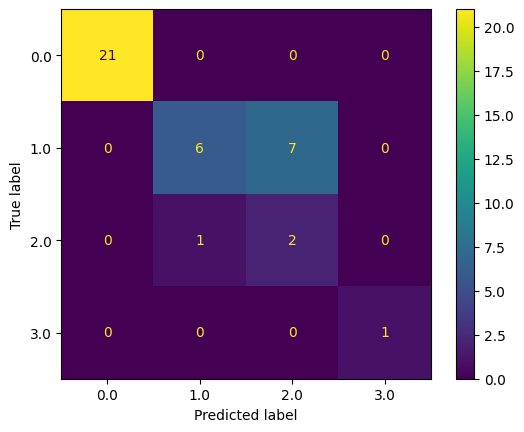

In [12]:
dft=pd.read_csv(r'C:\Users\marco\OneDrive - usp.br\Área de Trabalho\Mestrado\Resultados/gray_teste_imagens.csv', engine='python',sep=';')
Xt = dft.drop('Grade', axis =1)
yt = dft['Grade']
y_t = fit.predict(Xt)
print(classification_report(yt, y_t))
ConfusionMatrixDisplay.from_predictions(yt,y_t,values_format='.7g')
desempenho_cross_val = cross_val_score(gnb, Xt, yt, scoring = 'accuracy', cv = 5)
print('Desempenho médio: {}'.format(round(100*desempenho_cross_val.mean(),2)) + ' ± '+ '{}'.format(round(100*desempenho_cross_val.std(),2)))

Desempenho médio: 86.79 ± 7.95


c:\Users\marco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


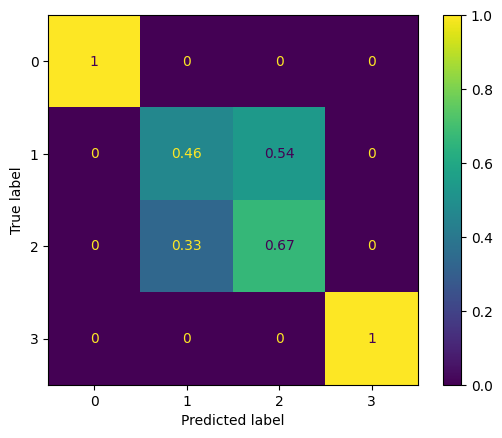

In [13]:
desempenho_cross_val = cross_val_score(gnb, Xt, yt, scoring = 'accuracy', cv = 5)
print('Desempenho médio: {}'.format(round(100*desempenho_cross_val.mean(),2)) + ' ± '+ '{}'.format(round(100*desempenho_cross_val.std(),2)))
# Confusion matrix
cm = confusion_matrix(yt, y_t)
    
    # Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Display the normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=[0, 1,2,3])
disp.plot()
plt.show()

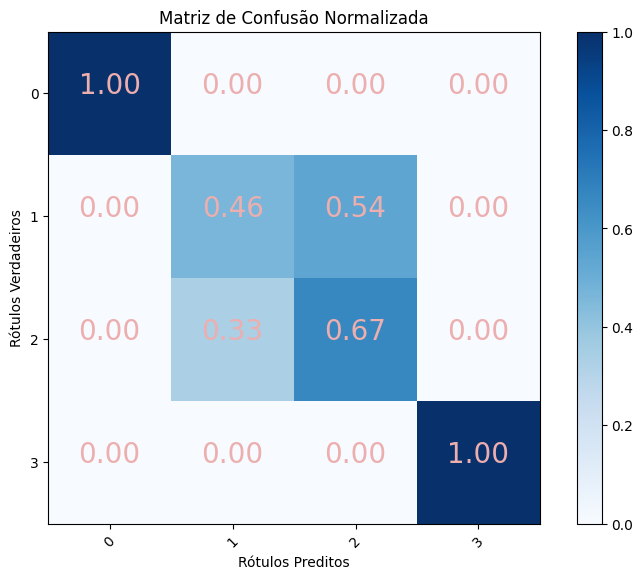

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calcular a matriz de confusão
cm = confusion_matrix(yt, y_t, normalize='true')

# Criar um heatmap
plt.figure(figsize=(8, 6))
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.title('Matriz de Confusão Normalizada')
plt.colorbar()

# Adicionar rótulos aos eixos
class_labels = ['0','1','2','3']  # Substitua pelos seus rótulos
# Configure o tamanho da fonte
plt.rc('font', size=20)  # Defina o tamanho da fonte desejado
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

# Adicionar os valores nas células
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, f"{cm[i, j]:.2f}", horizontalalignment="center", color="#ECAEAE")

plt.tight_layout()
plt.xlabel('Rótulos Preditos')
plt.ylabel('Rótulos Verdadeiros')
plt.show()